In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import requests
from urllib.parse import urlencode

### Описание данных
user_data:  
client – идентификатор пользователя  
premium – является ли клиент премиум  
age – возраст  

logs:  
client – идентификатор пользователя  
success – результат (успех - 1, нет - 0)  
platform – платформа  
time – время в формате Unix  

1. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

In [2]:
# Ссылка с данными о логах пользователей
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/E67ttPSdZP2Itg'

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

In [3]:
# Загружаем данные о логах пользователей
logs = pd.read_csv(download_url)
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [4]:
# Проверяем тип строк и  наличие пропущенных яйчеек
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [5]:
# Смотрим количество уникальных значений каждого столбца
logs.nunique()

client      4011
success        2
platform       3
time        4376
dtype: int64

In [6]:
# Ссылка с данными о пользователях
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/OO5NC1HYP6Ntug'

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

In [7]:
# Загружаем общие данные о пользователях
user_data = pd.read_csv(download_url)

In [8]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [9]:
# Проверяем тип строк и  наличие пропущенных яйчеек
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [10]:
# Выводим описательную статистику возраста пользователей
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


2. Какой клиент совершил больше всего успешных операций?  
Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания

In [11]:
# Считаем количество успешных действий для каждого клиента
successful = logs \
    .groupby(['client'], as_index=False) \
    .agg({'success': 'sum'})

# Находим максимальное количество успешных операций у одного клиента
max_success = successful.success.max()

In [12]:
# Создаем таблицу с клиентами, у которых максимальное количество успешных действий
most_successful = successful \
                  .query("success == @max_success") \
                  .sort_values('client')

# Создаем список id клиентов, которые подходят под наши критерии
most_successful = list(most_successful.client)
print(*most_successful, sep=', ')

12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584


3. С какой платформы осуществляется наибольшее количество успешных операций?

In [13]:
# Выводим количество успешных операций по платформам
logs \
    .groupby('platform') \
    .agg({'success': 'sum'})

,success
platform,
computer,1090
phone,2019
tablet,180


Наибольшее количество успешных операций было совершено через телефон

4. Какая платформа наиболее популярна среди премиумных клиентов?

In [14]:
# Соединим таблицы для расчета
analysis = user_data.merge(logs, on='client', how='inner')
analysis

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [16]:
# Считаем количество операций на каждой платформе среди премиум клиентов
analysis \
    .query('premium == True') \
    .platform \
    .value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

Наиболее популярной платформой для премиумных клиентов является телефон

5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с исходными параметрами.

C:\Users\Vlad_Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vlad_Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

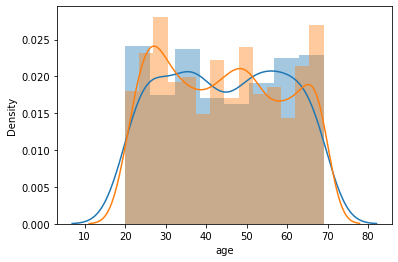

In [18]:
sns.distplot(analysis.query('premium==True').age)
sns.distplot(analysis.query('premium==False').age)

6. Постройте график распределения числа успешных операций:  
x – число успешных операций  
y – число клиентов, совершивших столько успешных операций

In [19]:
# Воспользуемся таблицей из предыдущей задачи, где мы посчитали количество успешных действий для каждого клиента
successful.head()

,client,success
0,40,1
1,50,1
2,75,1
3,81,1
4,132,1


<AxesSubplot:xlabel='success', ylabel='count'>

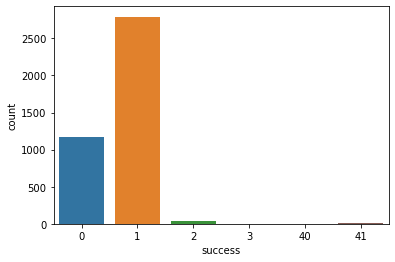

In [20]:
sns.countplot(x=successful.success)

7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста.  
По оси x – возраст, y – число успешных операций. 

In [23]:
# Считаем количество успешных операций на компьютере у каждого возраста
computer_success_age = analysis \
        .query('success==True and platform=="computer"') \
        .groupby('age', as_index=False) \
        .agg({'success': 'count'})
computer_success_age.head()

,age,success
0,20,11
1,21,15
2,22,8
3,23,15
4,24,26


<AxesSubplot:xlabel='age', ylabel='success'>

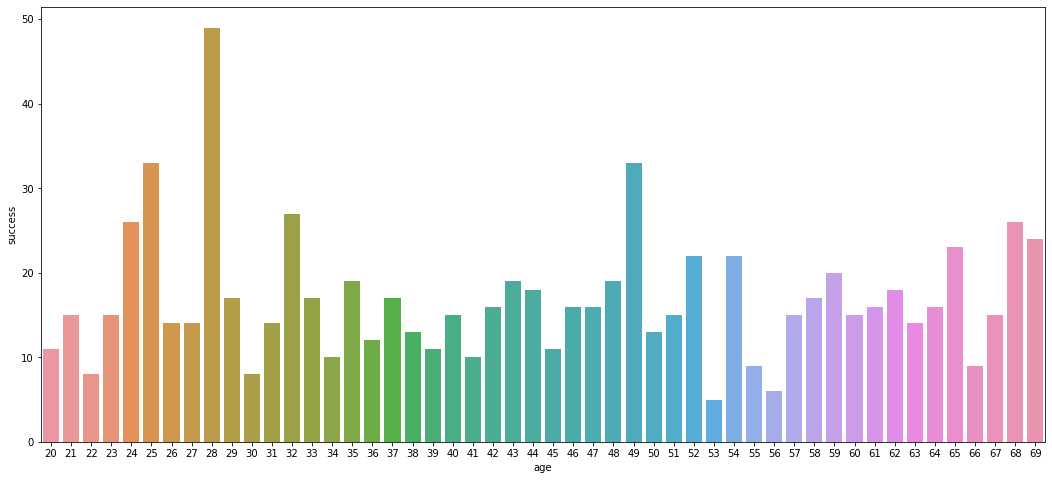

In [26]:
# Выводим требуемую таблицу
plt.figure(figsize=(18, 8))
sns.barplot(x='age', y='success', data=computer_success_age)